In [ ]:
data <- read.csv("Data_Train.csv")
head(data)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_Minute,Total_Stops,Additional_Info,Price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2025 1:10,2h 50m,170,0,No info,3897
2,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,445,2,No info,7662
3,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2025 4:25,19h,1140,2,No info,13882
4,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,325,1,No info,6218
5,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,285,1,No info,13302
6,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,9:00,11:25,2h 25m,145,0,No info,3873


In [ ]:
summary(data)

   Airline          Date_of_Journey       Source          Destination       
 Length:10682       Length:10682       Length:10682       Length:10682      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    Route             Dep_Time         Arrival_Time         Duration        
 Length:10682       Length:10682       Length:10682       Length:10682      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

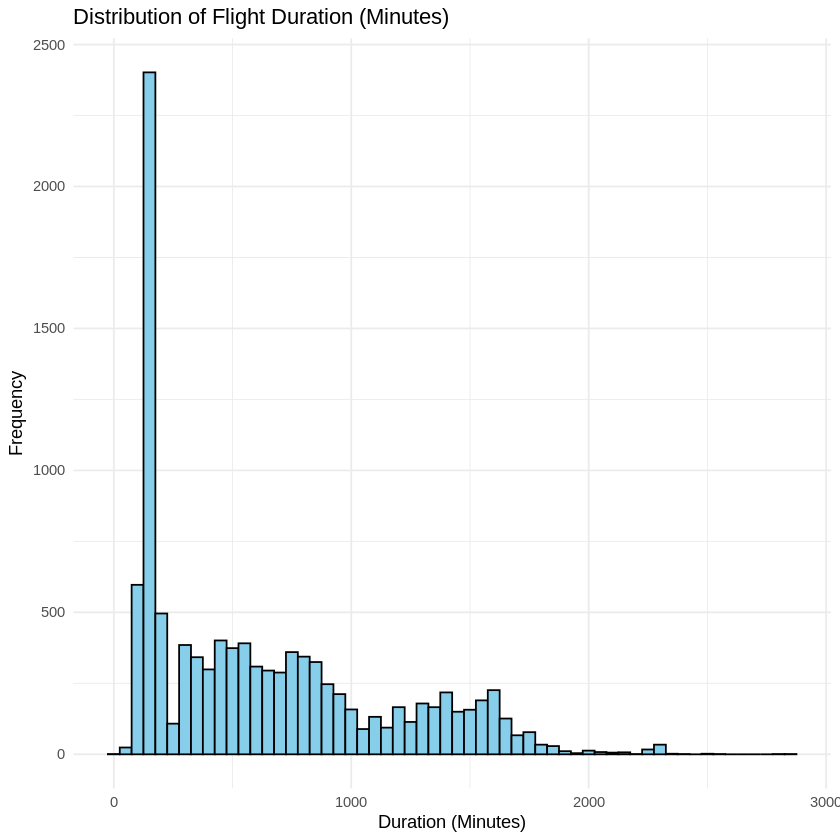

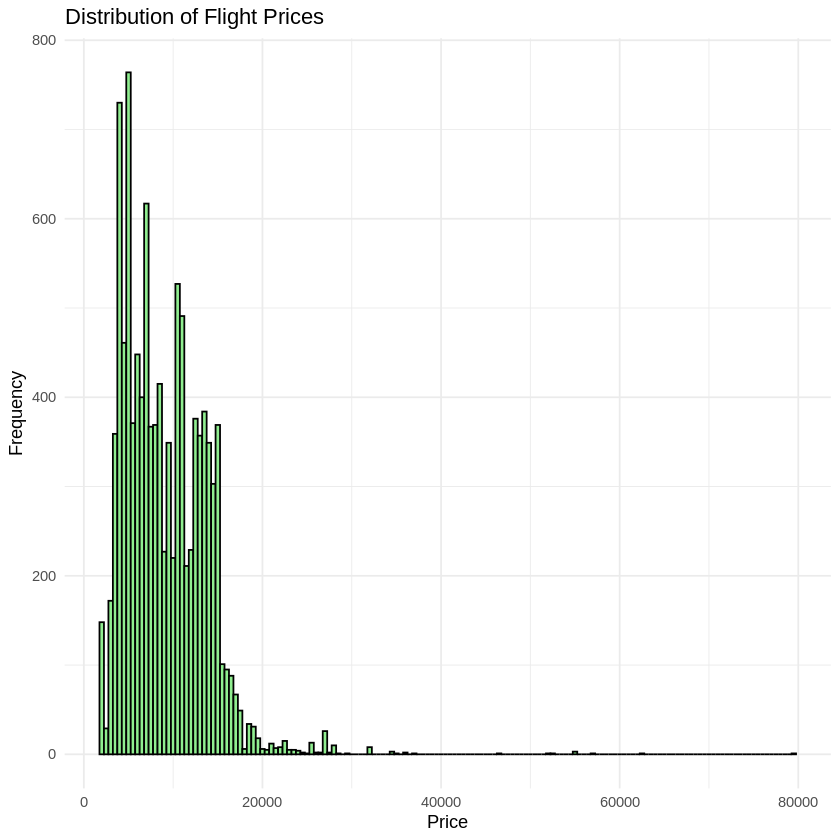

In [ ]:
library(ggplot2)

# Plot Histogram for Duration in Minutes
ggplot(data, aes(x = Duration_Minute)) +
  geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Flight Duration (Minutes)", x = "Duration (Minutes)", y = "Frequency") +
  theme_minimal()


ggplot(data, aes(x = Price)) +
  geom_histogram(binwidth = 500, fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Flight Prices", x = "Price", y = "Frequency") +
  theme_minimal()

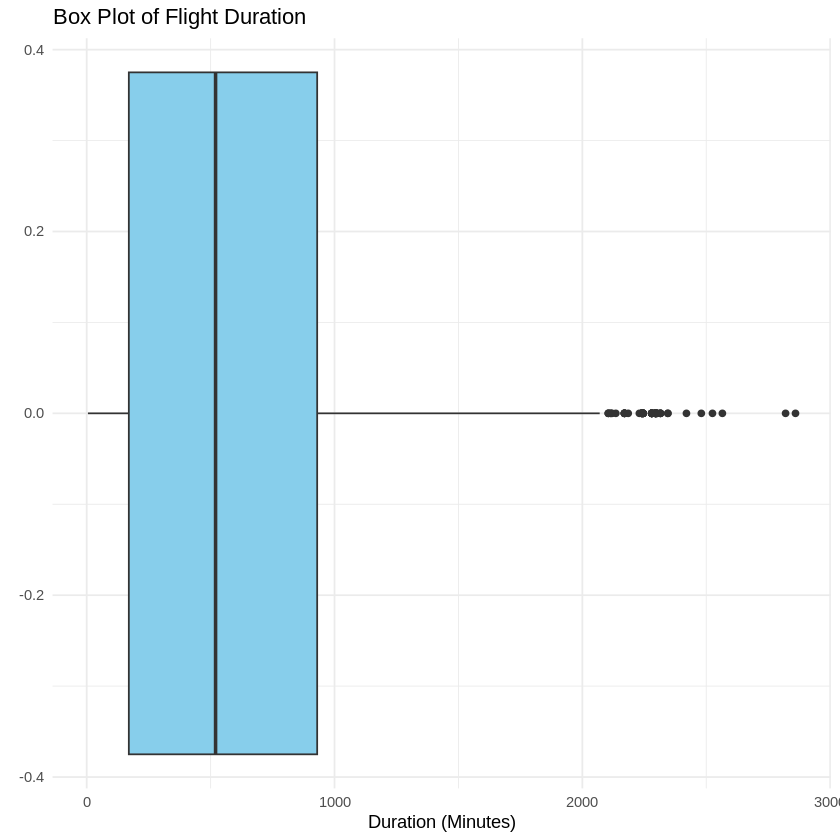

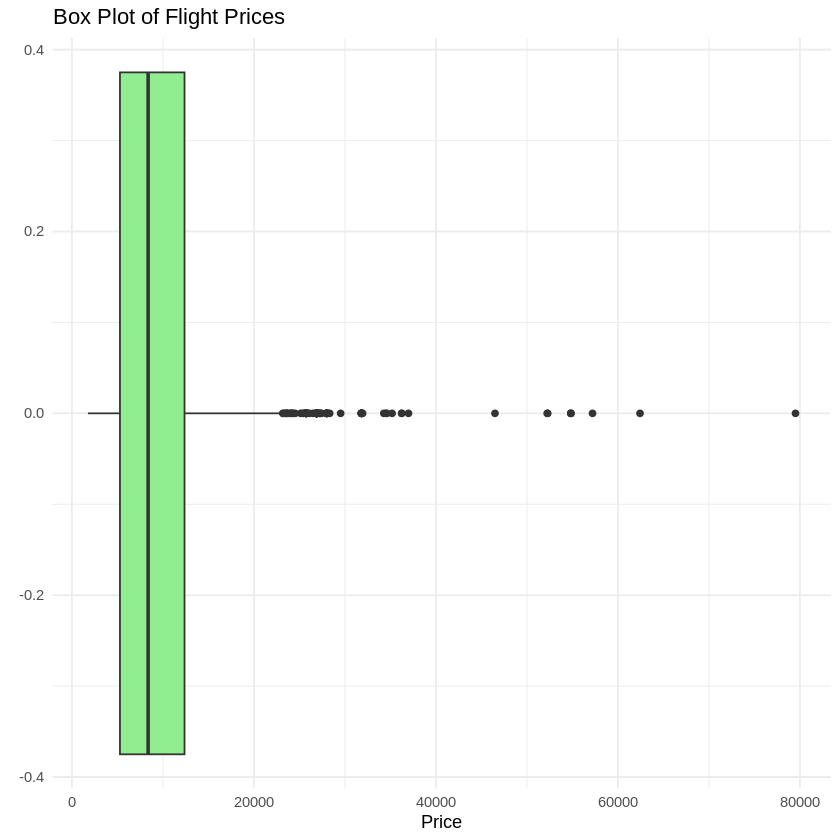

In [ ]:
# Horizontal boxplot for the corrected column name (e.g., Duration)
ggplot(data, aes(x = Duration_Minute)) +  # Use x for horizontal
  geom_boxplot(fill = "skyblue") +
  labs(title = "Box Plot of Flight Duration", x = "Duration (Minutes)") +  # Change label for x-axis
  theme_minimal()

# Horizontal boxplot for the 'Price' column
ggplot(data, aes(x = Price)) +  # Using 'Price' for the x-axis for horizontal orientation
  geom_boxplot(fill = "lightgreen") +  # Customize the color
  labs(title = "Box Plot of Flight Prices", x = "Price") +  # Set title and x-axis label
  theme_minimal()  # Apply minimal theme


In [ ]:
data_selected <- data[, c('Duration_Minute', 'Total_Stops')]

# Calculate the correlation matrix
correlation_matrix <- cor(data_selected)
print(correlation_matrix)

                Duration_Minute Total_Stops
Duration_Minute       1.0000000   0.7380709
Total_Stops           0.7380709   1.0000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



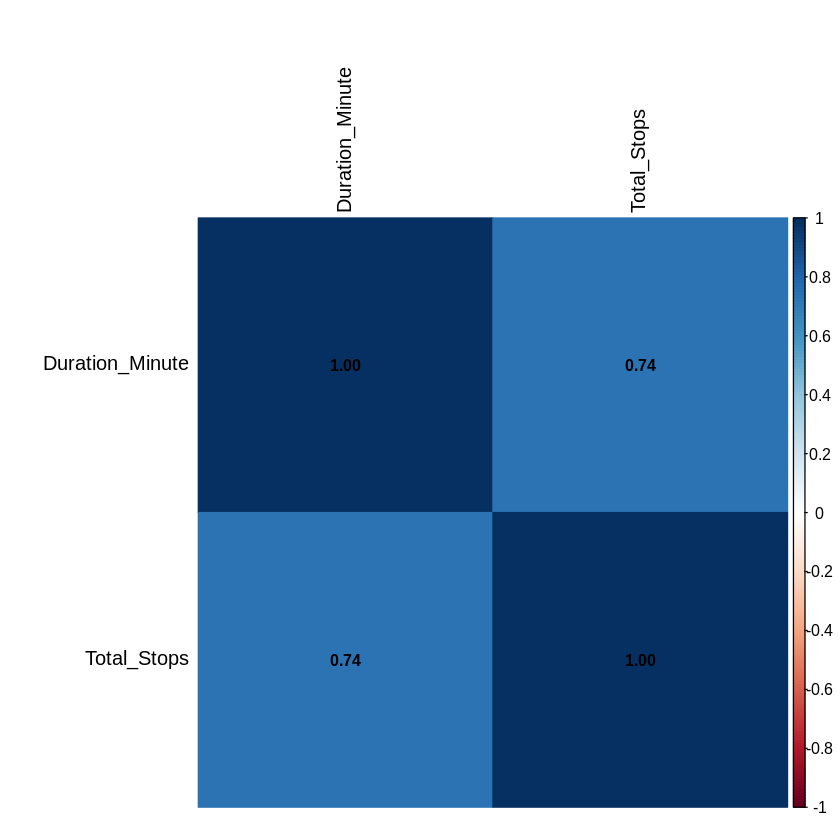

In [ ]:
install.packages("corrplot")

# Load the package
library(corrplot)

# Now you can plot the correlation matrix
corrplot(correlation_matrix, method = "color", addCoef.col = "black", tl.col = "black", number.cex = 0.8)

In [ ]:
# Manual VIF calculation (no packages needed)
model <- lm(Price ~ Duration_Minute + Total_Stops, data = data)

# Get R-squared for each predictor
r2_duration <- summary(lm(Duration_Minute ~ Total_Stops, data = data))$r.squared
r2_stops <- summary(lm(Total_Stops ~ Duration_Minute, data = data))$r.squared

# Calculate VIF manually
vif_duration <- 1 / (1 - r2_duration)
vif_stops <- 1 / (1 - r2_stops)

# Display results
print(paste("VIF for Duration_Minute:", round(vif_duration, 2)))
print(paste("VIF for Total_Stops:", round(vif_stops, 2)))

[1] "VIF for Duration_Minute: 2.2"
[1] "VIF for Total_Stops: 2.2"


In [ ]:
# set.seed(123)  # for reproducibility
sample_index <- sample(1:nrow(data), 0.9*nrow(data))
train <- data[sample_index, ]
test <- data[-sample_index, ]

In [ ]:
initial_model <- lm(Price ~ Duration_Minute, data = train)
summary(initial_model)


Call:
lm(formula = Price ~ Duration_Minute, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -9202  -2531   -987   1720  71799 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.149e+03  6.617e+01   92.93   <2e-16 ***
Duration_Minute 4.598e+00  8.084e-02   56.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4019 on 9611 degrees of freedom
Multiple R-squared:  0.2518,	Adjusted R-squared:  0.2517 
F-statistic:  3234 on 1 and 9611 DF,  p-value: < 2.2e-16


In [ ]:
model <- lm(Price ~ Duration_Minute + Total_Stops, data = train)
summary(model)


Call:
lm(formula = Price ~ Duration_Minute + Total_Stops, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -9633  -2132   -787   1545  70202 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5454.8295    62.5658   87.19   <2e-16 ***
Duration_Minute    1.2749     0.1092   11.67   <2e-16 ***
Total_Stops     3421.3759    82.1484   41.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3678 on 9610 degrees of freedom
Multiple R-squared:  0.3715,	Adjusted R-squared:  0.3714 
F-statistic:  2840 on 2 and 9610 DF,  p-value: < 2.2e-16


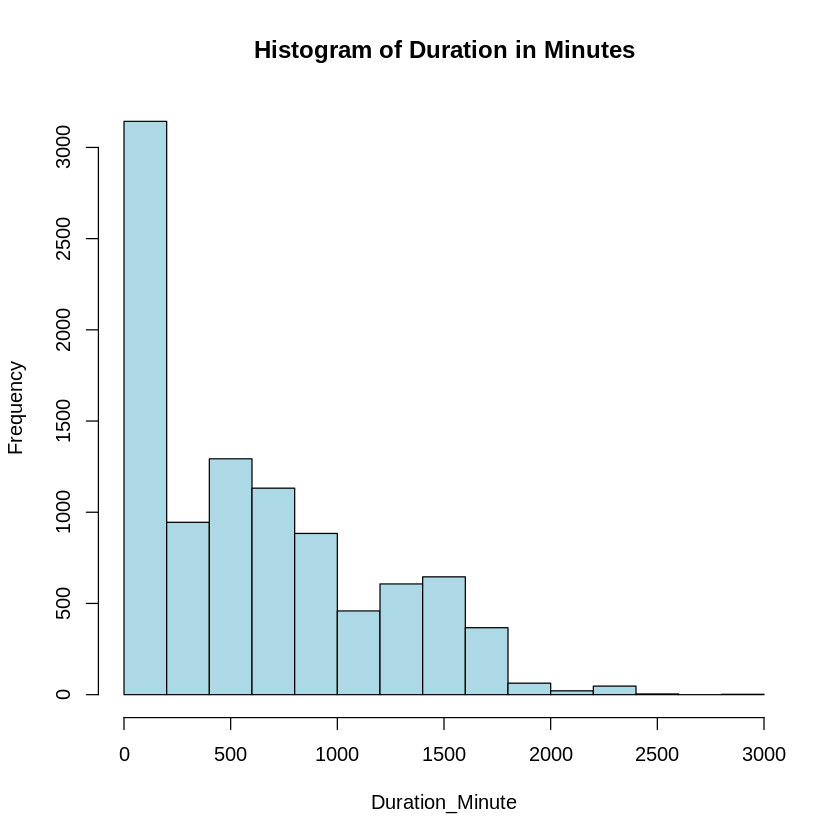

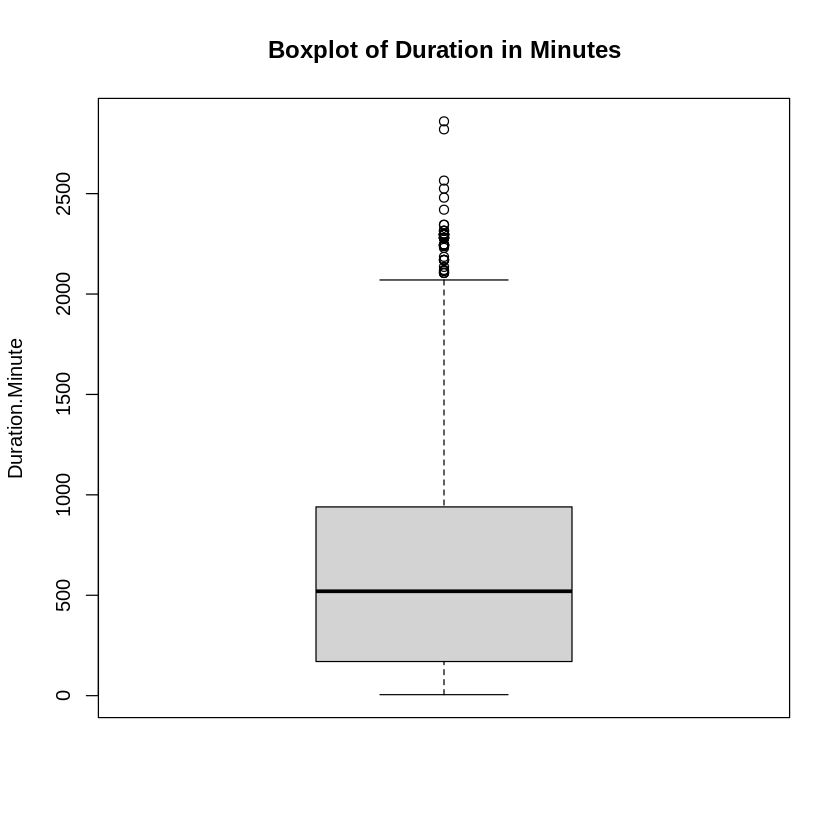

In [ ]:
# Histogram to visually inspect skewness
hist(train$Duration_Minute, main = "Histogram of Duration in Minutes", xlab = "Duration_Minute", col = "lightblue", border = "black")

# Boxplot to check for skewness and outliers
boxplot(train$Duration_Minute, main = "Boxplot of Duration in Minutes", ylab = "Duration.Minute")

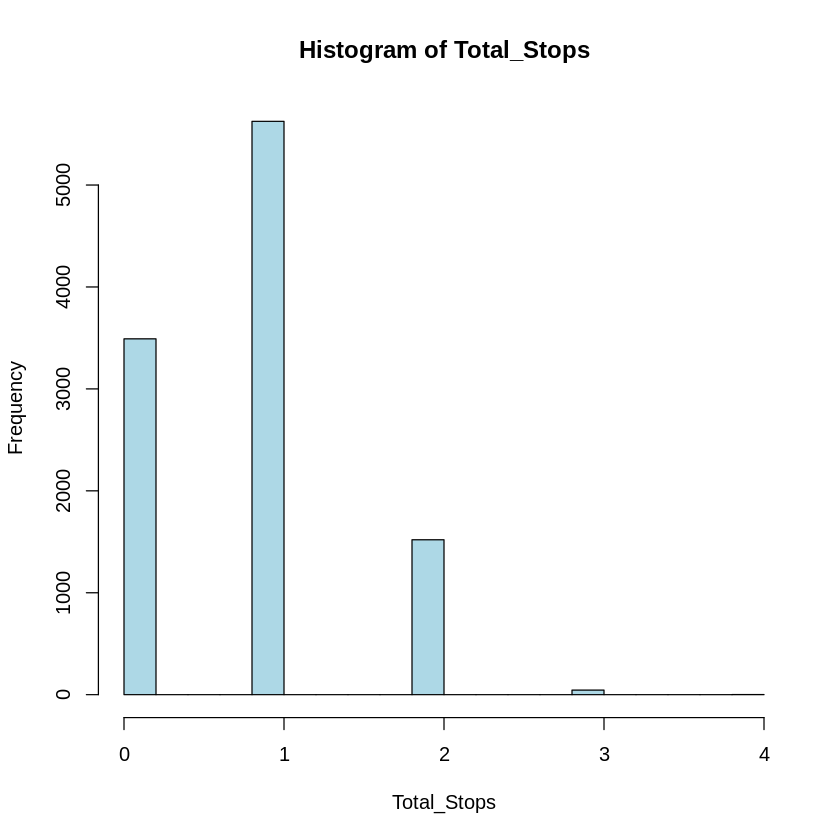

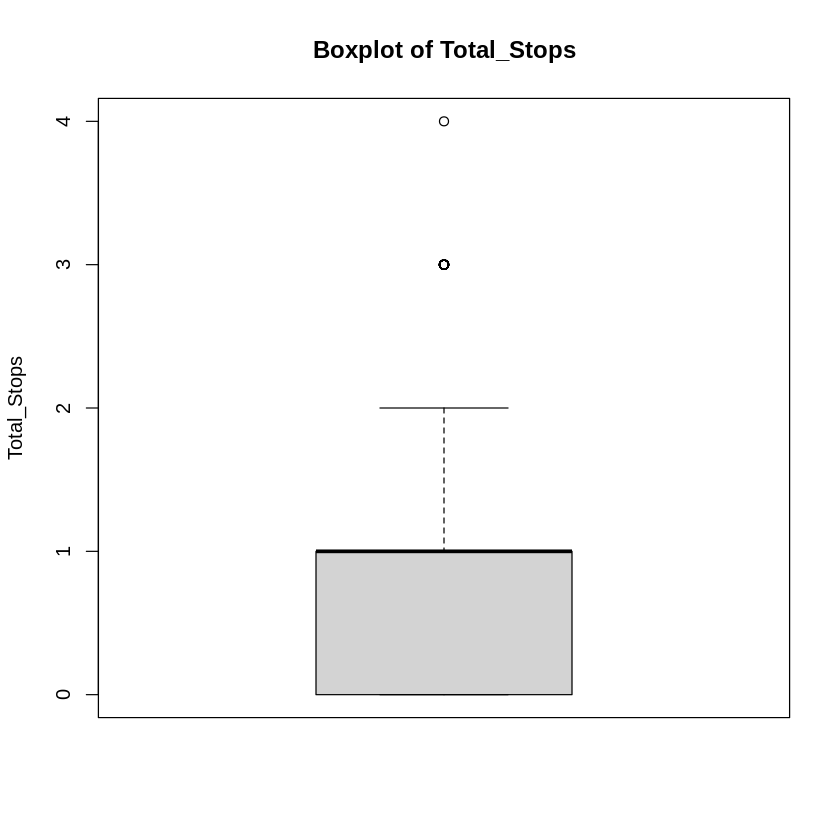

In [ ]:
# Histogram to visually inspect skewness
hist(data$Total_Stops, main = "Histogram of Total_Stops", xlab = "Total_Stops", col = "lightblue", border = "black")

# Boxplot to check for skewness and outliers
boxplot(data$Total_Stops, main = "Boxplot of Total_Stops", ylab = "Total_Stops")


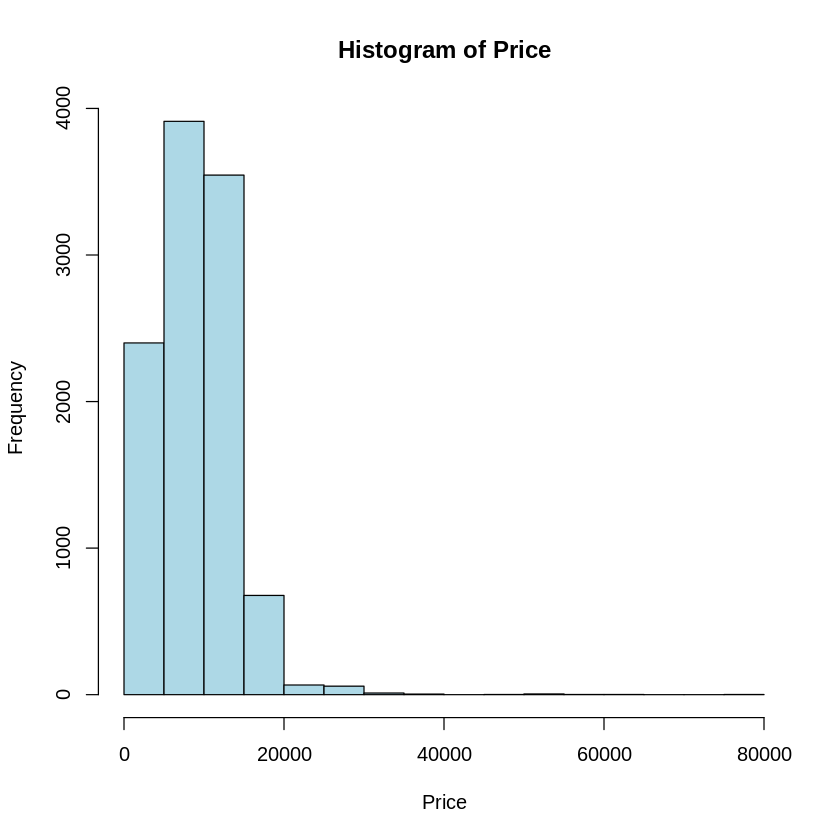

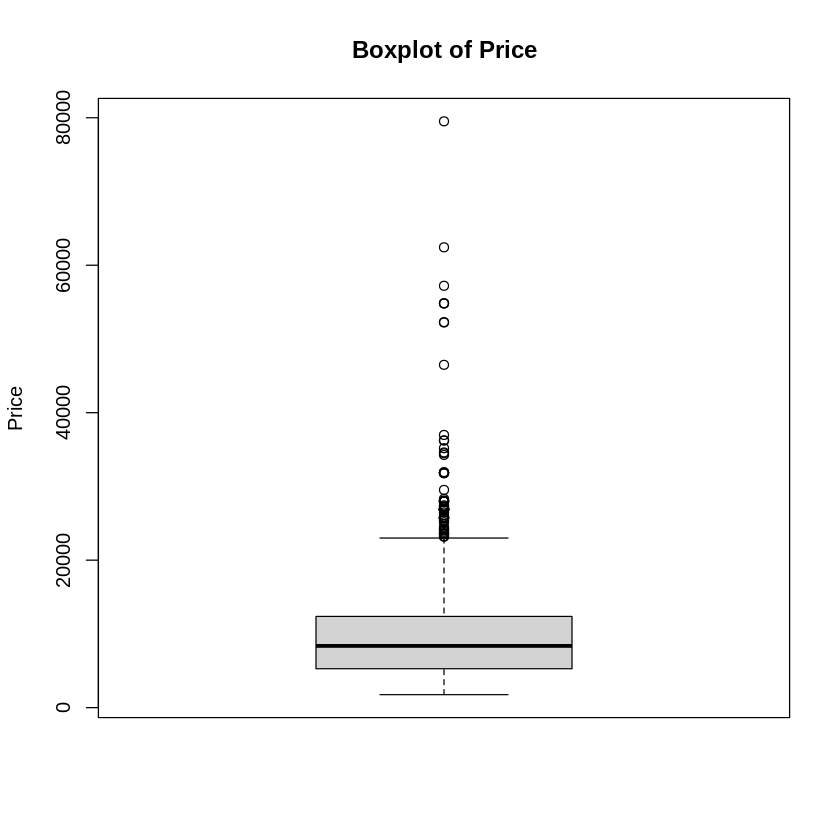

In [ ]:
# Histogram to visually inspect skewness
hist(data$Price, main = "Histogram of Price", xlab = "Price", col = "lightblue", border = "black")

# Boxplot to check for skewness and outliers
boxplot(data$Price, main = "Boxplot of Price", ylab = "Price")


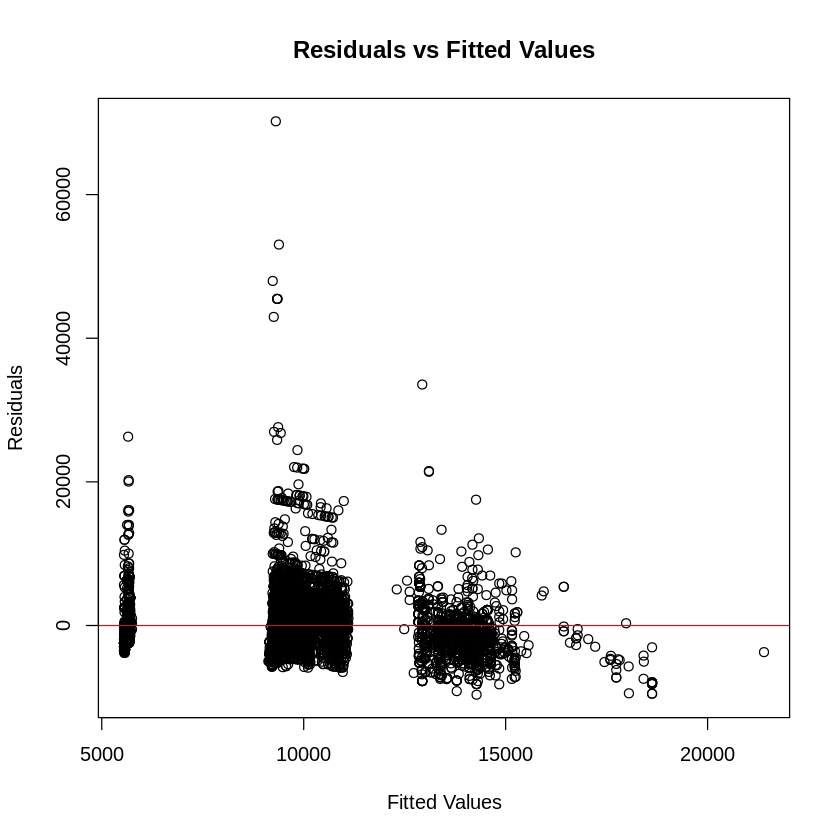

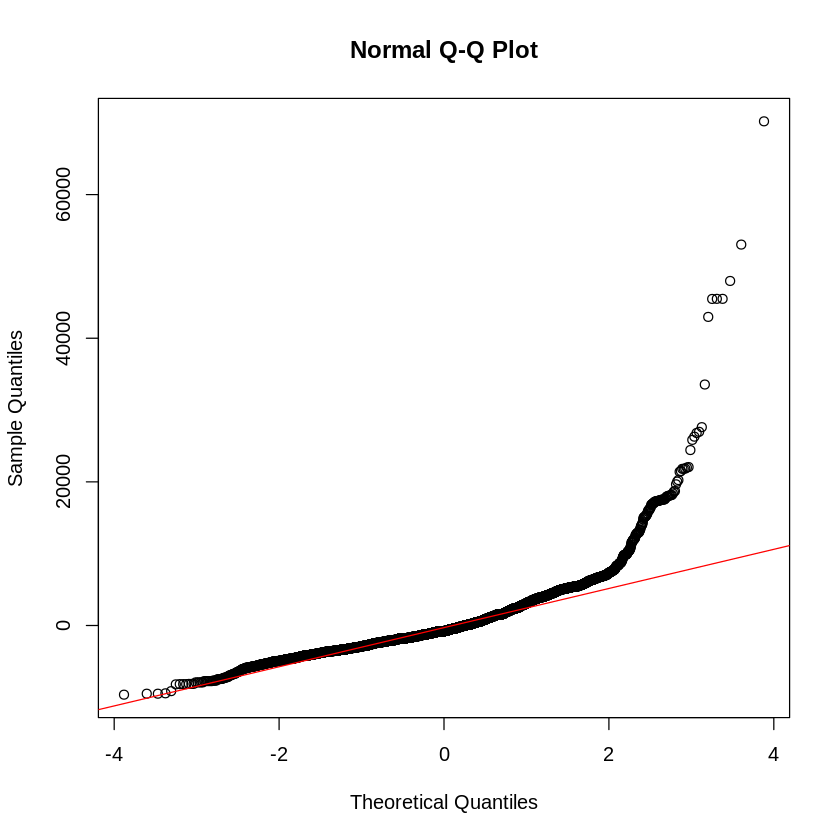

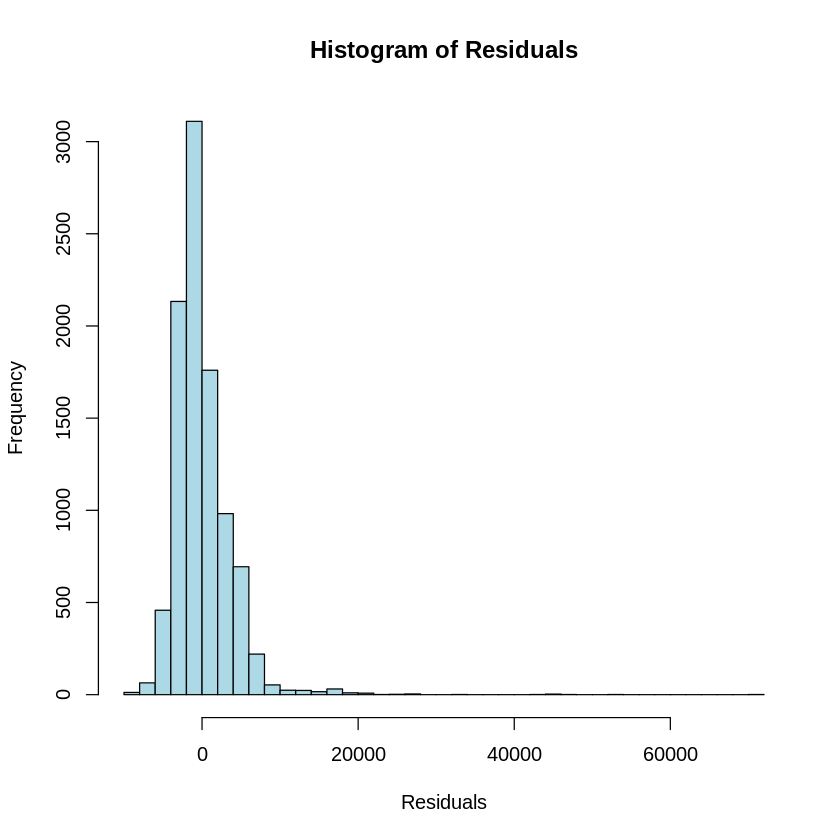

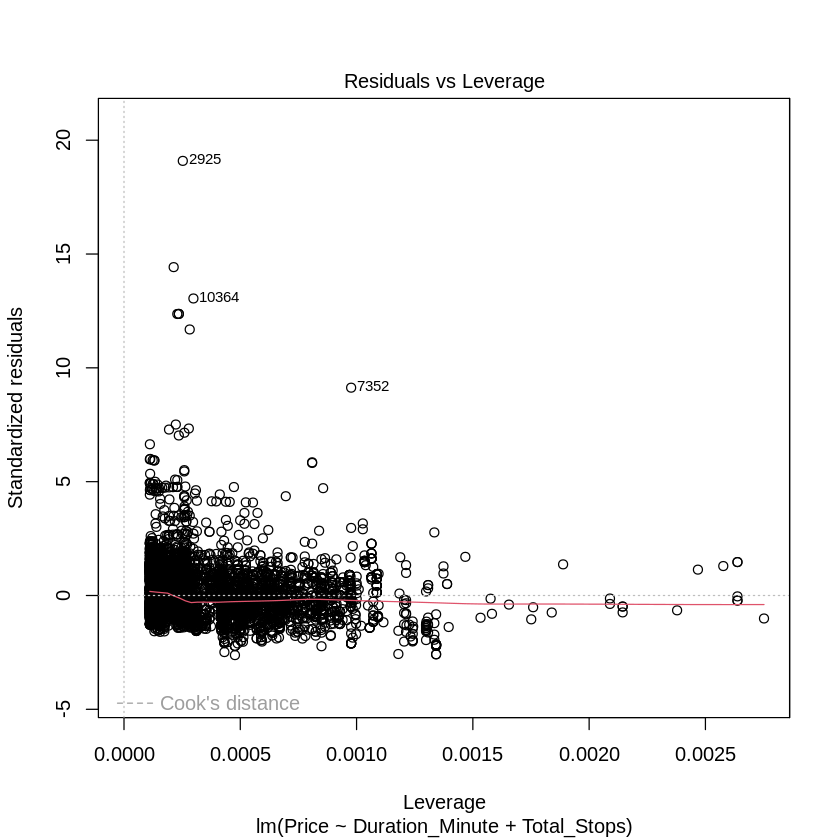

In [ ]:
residuals <- resid(model)
# 1. Plot Residuals vs. Fitted Values (Check for Linearity & Homoscedasticity)
plot(model$fitted.values, model$residuals,
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values")
abline(h = 0, col = "red")  # Add a horizontal line at 0

# 2. Q-Q Plot for Normality of Residuals
qqnorm(model$residuals)
qqline(model$residuals, col = "red")  # Add a reference line

# 3. Histogram of Residuals for Normality
hist(model$residuals, main = "Histogram of Residuals", xlab = "Residuals",
     col = "lightblue", border = "black", breaks = 50)

# 4. Plot of Residuals vs. Leverage (Identify Outliers)
plot(model, which = 5)  # Leverage plot

In [ ]:
#Applying log transformation
train$Duration_Minute <- log(train$Duration_Minute + 1)  # Adding 1 to avoid log(0)
train$Price <- log(train$Price + 1)  # Same for Price
# train$Total_Stops_transformed <- log(train$Total_Stops + 1)  # Same for Price
train$Total_Stops <- sqrt(train$Total_Stops)

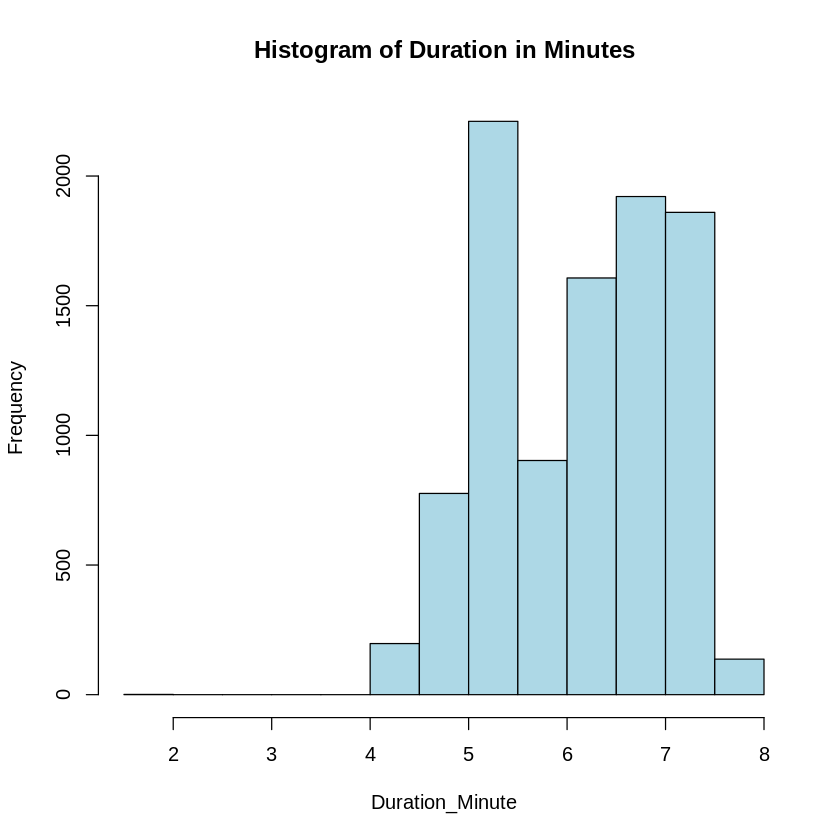

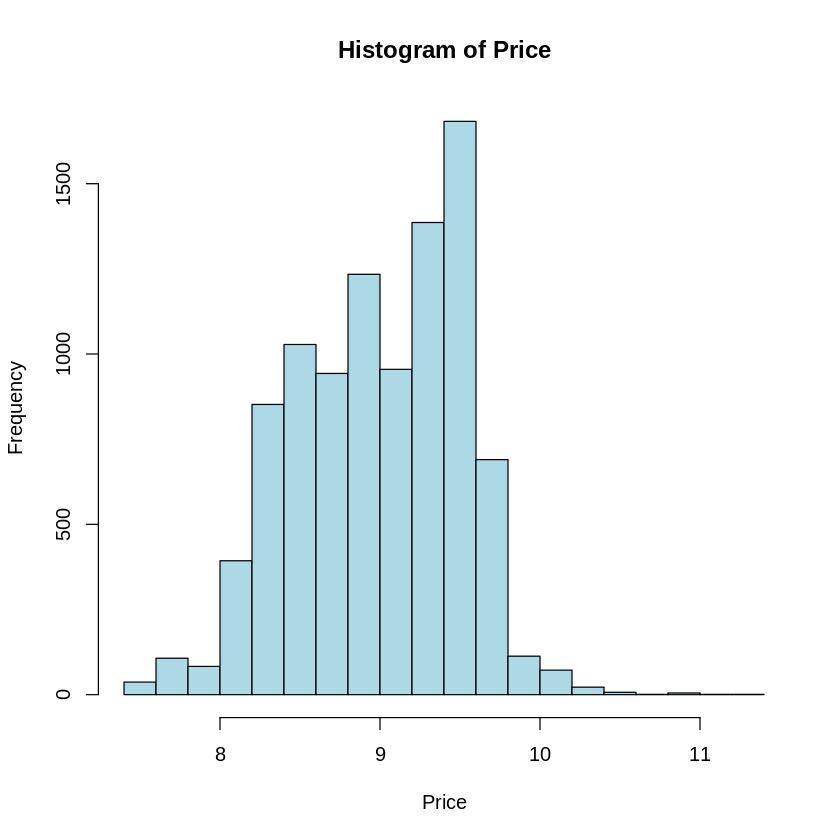

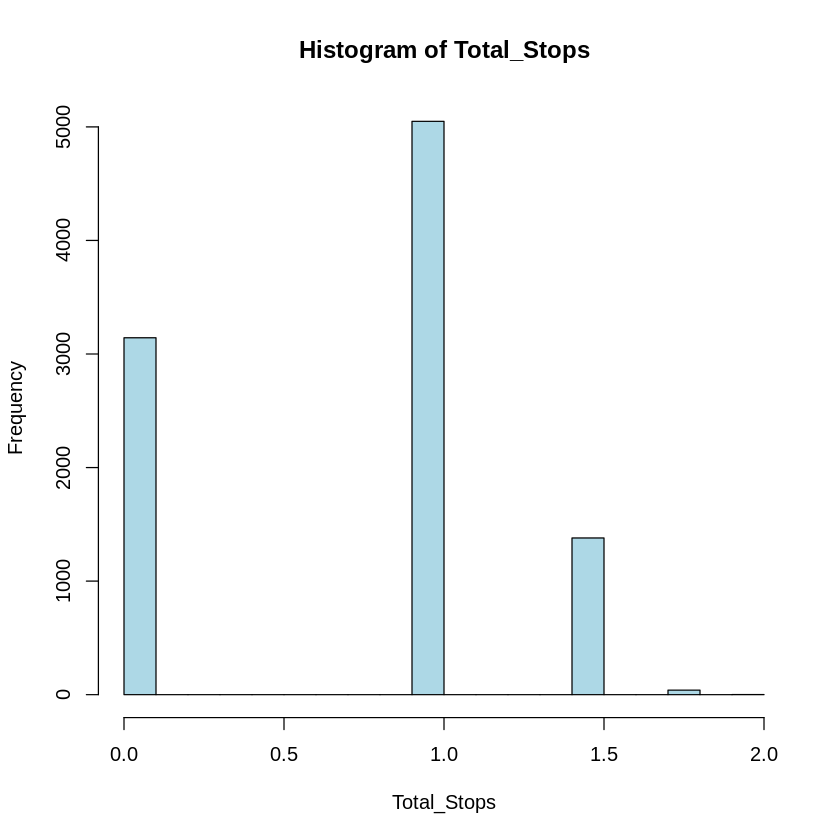

In [ ]:
hist(train$Duration_Minute, main = "Histogram of Duration in Minutes", xlab = "Duration_Minute", col = "lightblue", border = "black")
hist(train$Price, main = "Histogram of Price", xlab = "Price", col = "lightblue", border = "black")
hist(train$Total_Stops, main = "Histogram of Total_Stops", xlab = "Total_Stops", col = "lightblue", border = "black")

In [ ]:
initial_model_1 <- lm(train$Price ~ train$Duration_Minute, data = train)
summary(initial_model_1)


Call:
lm(formula = train$Price ~ train$Duration_Minute, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -9202  -2531   -987   1720  71799 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.149e+03  6.617e+01   92.93   <2e-16 ***
train$Duration_Minute 4.598e+00  8.084e-02   56.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4019 on 9611 degrees of freedom
Multiple R-squared:  0.2518,	Adjusted R-squared:  0.2517 
F-statistic:  3234 on 1 and 9611 DF,  p-value: < 2.2e-16


In [ ]:
initial_model_2 <- lm(train$Price ~ train$Total_Stops, data = train)
summary(initial_model_2)


Call:
lm(formula = train$Price ~ train$Total_Stops, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
 -9543  -2138   -837   1548  69674 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5681.42      59.75   95.08   <2e-16 ***
train$Total_Stops  4156.28      56.18   73.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3709 on 9611 degrees of freedom
Multiple R-squared:  0.3629,	Adjusted R-squared:  0.3628 
F-statistic:  5473 on 1 and 9611 DF,  p-value: < 2.2e-16


In [ ]:
model_log <- lm(train$Price ~ train$Duration_Minute + train$Total_Stops, data = train)
summary(model_log)


Call:
lm(formula = train$Price ~ train$Duration_Minute + train$Total_Stops, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0738 -0.2251 -0.0196  0.2222  2.2391 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           7.469856   0.039789  187.74   <2e-16 ***
train$Duration_Minute 0.199330   0.007858   25.37   <2e-16 ***
train$Total_Stops     0.412279   0.013380   30.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3382 on 9610 degrees of freedom
Multiple R-squared:  0.5684,	Adjusted R-squared:  0.5683 
F-statistic:  6328 on 2 and 9610 DF,  p-value: < 2.2e-16


Warning message in abline(model_log, col = "red", lwd = 2):
“only using the first two of 3 regression coefficients”


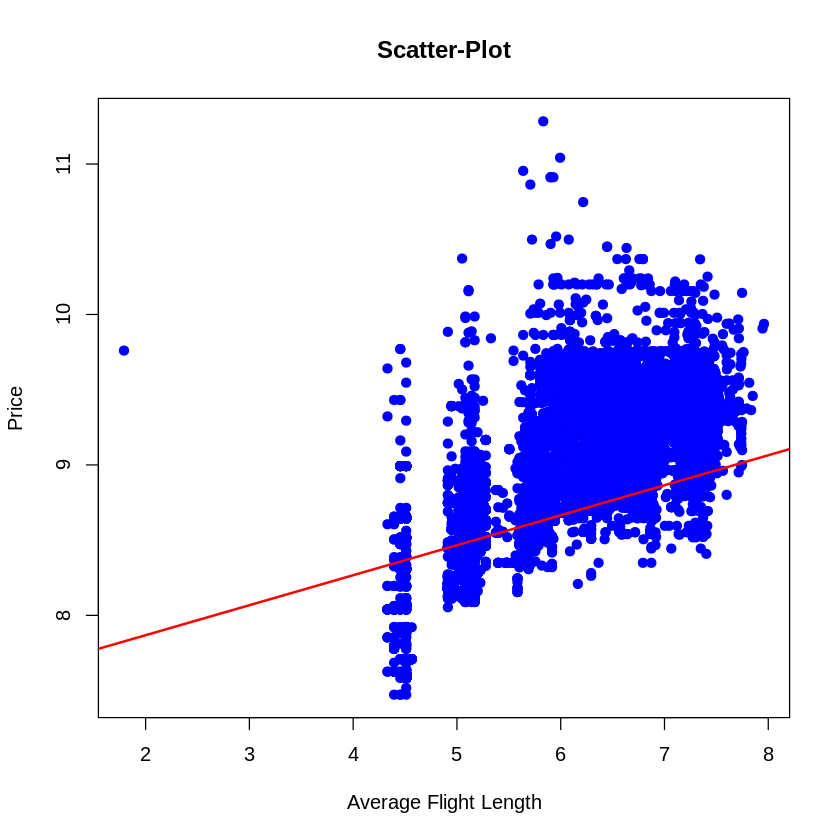

In [ ]:
# Scatter plot with regression line
plot(train$Duration_Minute, train$Price, main = "Scatter-Plot", xlab = "Average Flight Length", ylab = "Price", pch = 19,col="blue")
abline(model_log, col = "red", lwd = 2)

In [ ]:
train$Total_Stops_fact <- as.factor(train$Total_Stops)
train$Total_Stops_fact

[1] 1.4142135623731  0                0                0               
   [5] 1                1.4142135623731  0                1               
   [9] 1                1                1                1               
  [13] 0                1.4142135623731  1                1               
  [17] 0                1                1                1               
  [21] 1                0                1.4142135623731  1               
  [25] 1.4142135623731  1                1.4142135623731  1               
  [29] 1.4142135623731  1                1                0               
  [33] 1.4142135623731  1.4142135623731  0                1.4142135623731 
  [37] 1                1.4142135623731  0                0               
  [41] 1.4142135623731  1                0                1               
  [45] 0                1.73205080756888 1                1               
  [49] 1                0                1                0               
  [53] 1                0                1                1.4142135623731 
  [57] 1                0                1.4142135623731  1               
  [61] 0                1                1.4142135623731  1               
  [65] 0                1                1                1               
  [69] 1                0                1                1               
  [73] 0                1                1                0               
  [77] 1                0                0                0               
  [81] 1                1                1.4142135623731  1               
  [85] 1                0                1                0               
  [89] 0                0                1                0               
  [93] 1                0                1.4142135623731  1               
  [97] 0                0                0                1               
 [101] 0                1                1                1.4142135623731 
 [105] 0                1.4142135623731  0                1.4142135623731 
 [109] 1.4142135623731  0                1                1               
 [113] 1                1                0                0               
 [117] 0                1                1                0               
 [121] 1                0                1                1               
 [125] 0                1.4142135623731  1                1.4142135623731 
 [129] 1.4142135623731  1                1                1               
 [133] 1.4142135623731  1.4142135623731  1.4142135623731  1               
 [137] 1                1                1                1               
 [141] 1                1.4142135623731  0                1.4142135623731 
 [145] 1                1                1                1.4142135623731 
 [149] 1                1                0                1               
 [153] 1                1                1                0               
 [157] 1                1.4142135623731  1                1               
 [161] 0                0                0                1               
 [165] 0                1                0                1.4142135623731 
 [169] 0                1                0                1.4142135623731 
 [173] 1.4142135623731  0                0                0               
 [177] 0                0                1                1               
 [181] 1.4142135623731  0                0                1.4142135623731 
 [185] 1                1                0                1               
 [189] 0                1.4142135623731  1                1               
 [193] 1.4142135623731  0                1                1               
 [197] 1                0                1                1               
 [201] 1                1.4142135623731  1                0               
 [205] 0                1                0                1               
 [209] 1                0                1                1.4142135623731 
 [213] 1                1   

In [ ]:
model_new <- lm(train$Price ~ train$Duration_Minute + train$Total_Stops_fact, data = train)
summary(model_new)


Call:
lm(formula = train$Price ~ train$Duration_Minute + train$Total_Stops_fact, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03864 -0.21973 -0.01461  0.22295  2.22028 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            7.488089   0.039846 187.927   <2e-16 ***
train$Duration_Minute                  0.194156   0.007895  24.594   <2e-16 ***
train$Total_Stops_fact1                0.443009   0.014421  30.720   <2e-16 ***
train$Total_Stops_fact1.4142135623731  0.567724   0.019461  29.173   <2e-16 ***
train$Total_Stops_fact1.73205080756888 0.572961   0.056591  10.125   <2e-16 ***
train$Total_Stops_fact2                0.840347   0.338261   2.484    0.013 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3376 on 9607 degrees of freedom
Multiple R-squared:   0.57,	Adjusted R-squared:  0.5697 
F-statistic:  2546 on 5 and 9607 DF,

Warning message in abline(model_new, col = "red", lwd = 2):
“only using the first two of 6 regression coefficients”


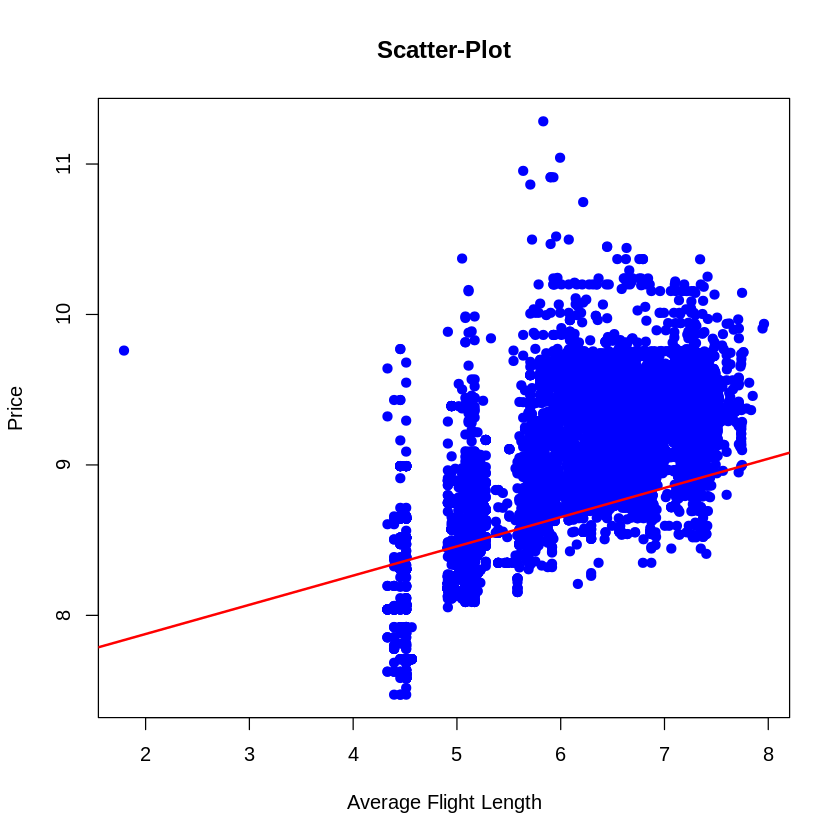

In [ ]:
plot(train$Duration_Minute, train$Price, main = "Scatter-Plot", xlab = "Average Flight Length", ylab = "Price", pch = 19,col="blue")
abline(model_new, col = "red", lwd = 2)

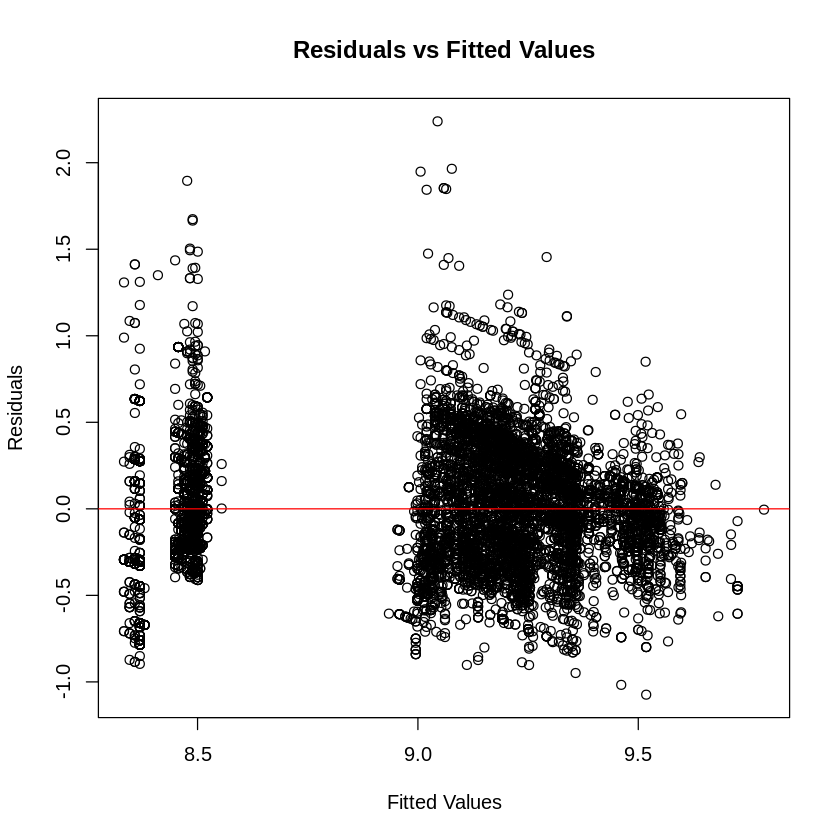

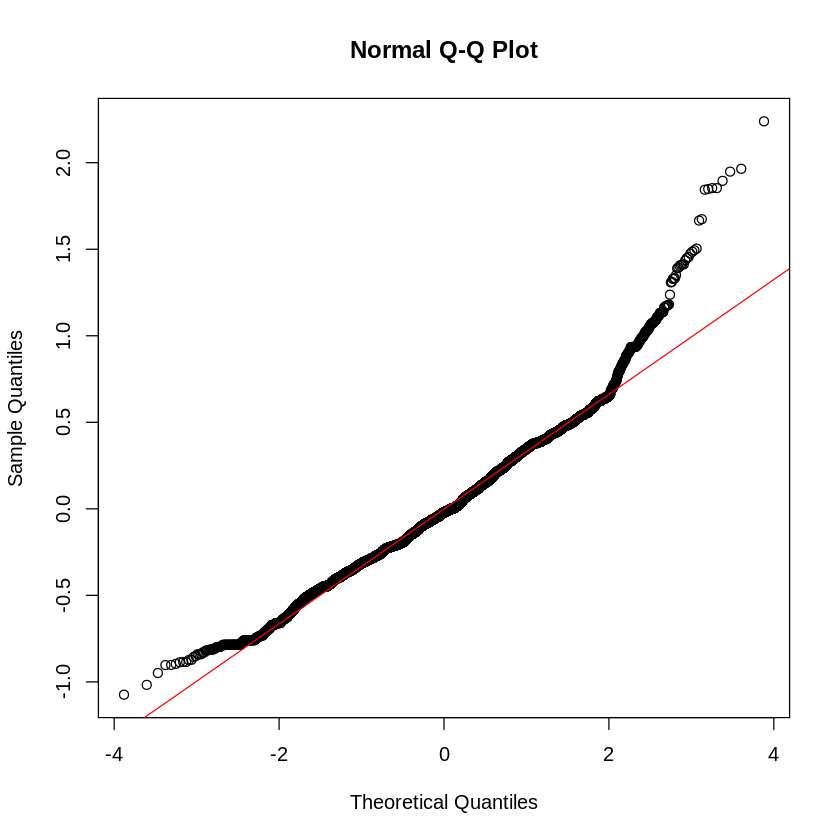

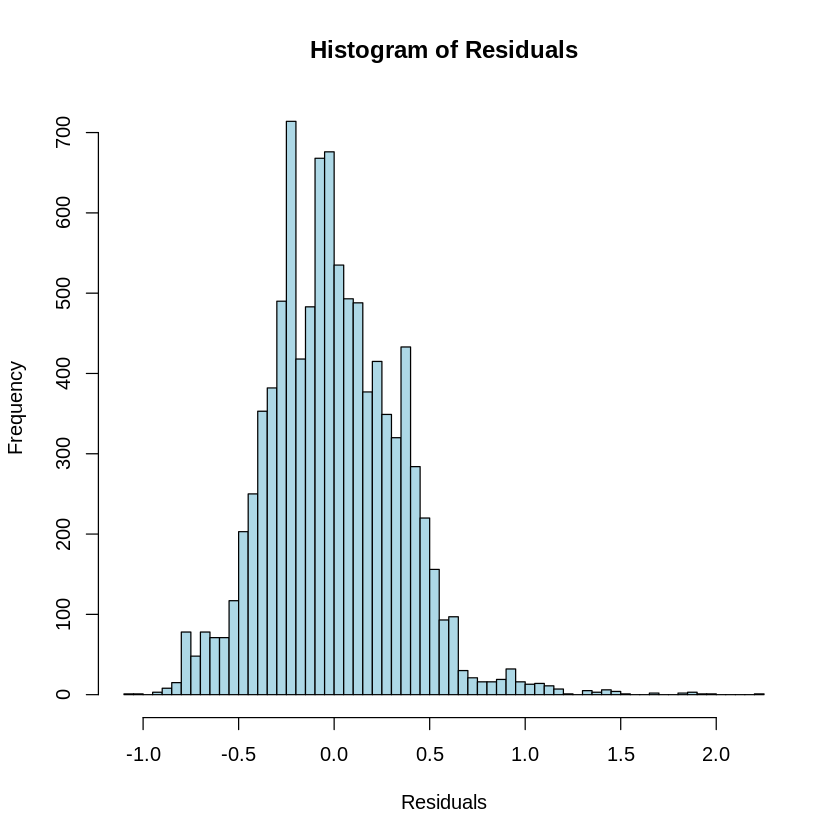

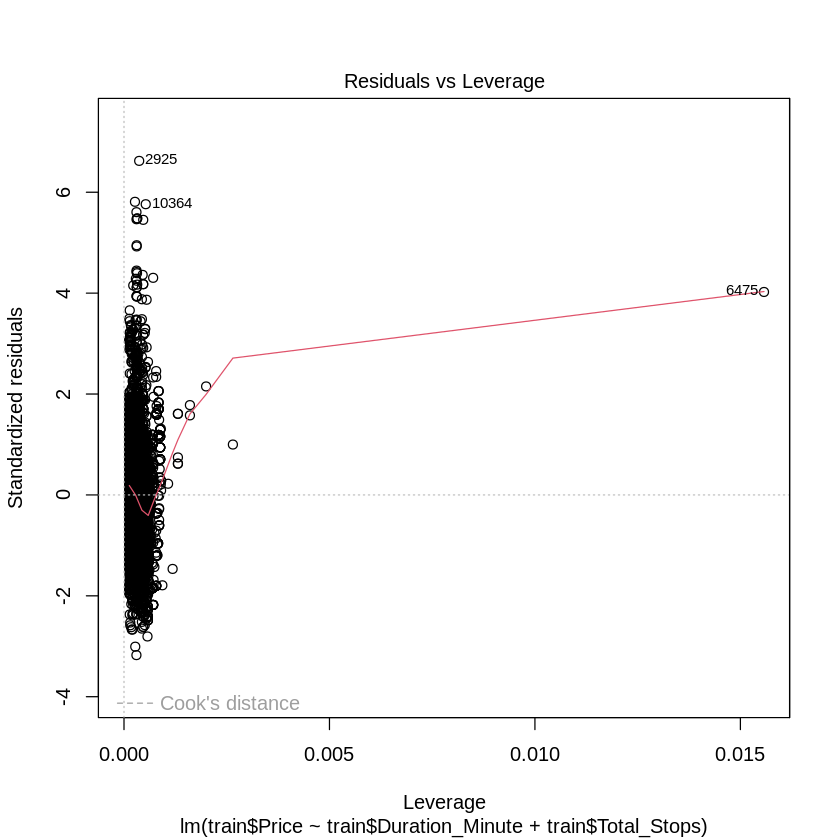

In [ ]:
residuals <- resid(model_log)
# 1. Plot Residuals vs. Fitted Values (Check for Linearity & Homoscedasticity)
plot(model_log$fitted.values, model_log$residuals,
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted Values")
abline(h = 0, col = "red")  # Add a horizontal line at 0

# 2. Q-Q Plot for Normality of Residuals
qqnorm(model_log$residuals)
qqline(model_log$residuals, col = "red")  # Add a reference line

# 3. Histogram of Residuals for Normality
hist(model_log$residuals, main = "Histogram of Residuals", xlab = "Residuals",
     col = "lightblue", border = "black", breaks = 50)

# 4. Plot of Residuals vs. Leverage (Identify Outliers)
plot(model_log, which = 5)  # Leverage plot

Warning message in abline(model_log, col = "red", lwd = 2):
“only using the first two of 3 regression coefficients”


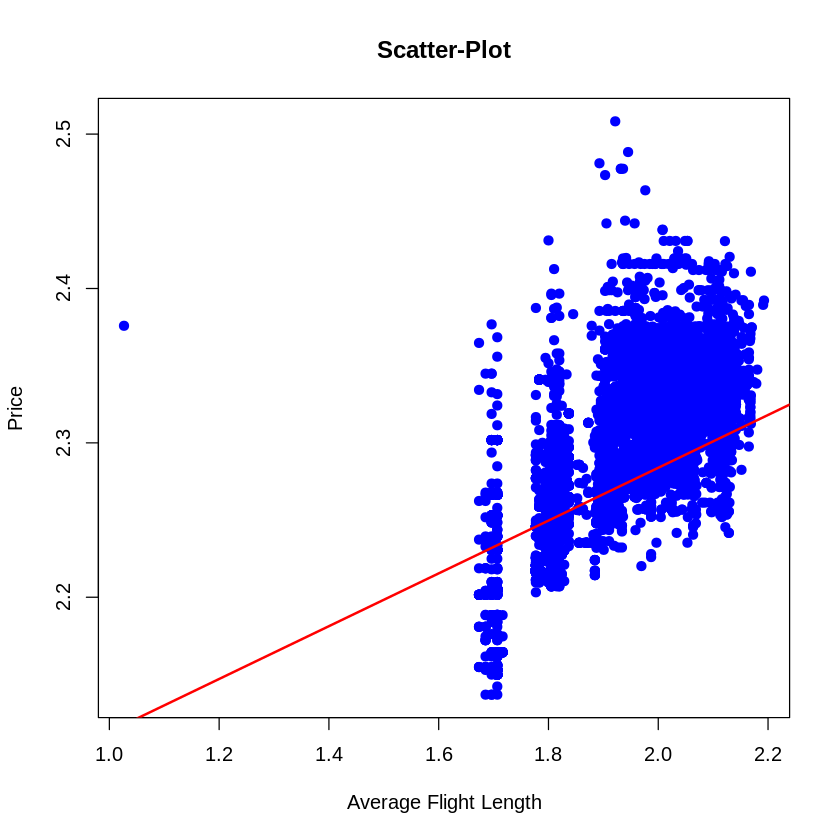

In [ ]:
# Scatter plot with regression line
plot(train$Duration_Minute,train$Price, main = "Scatter-Plot", xlab = "Average Flight Length", ylab = "Price", pch = 19,col="blue")
abline(model_log, col = "red", lwd = 2)

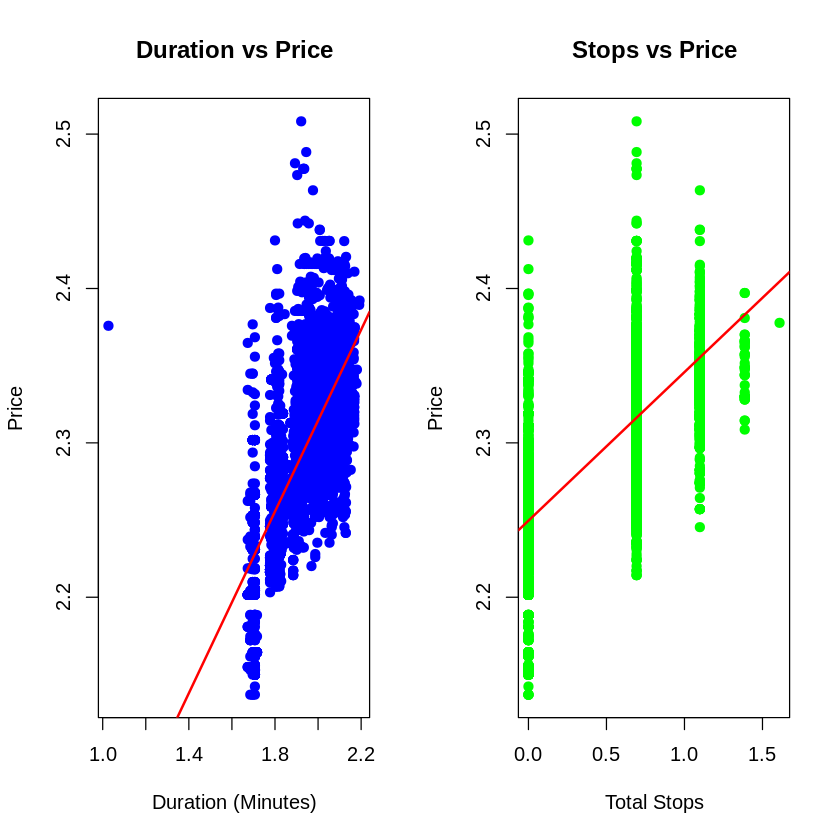

In [ ]:
par(mfrow = c(1, 2))

# Plot 1: Duration vs Price
plot(train$Duration_Minute, train$Price,
     main = "Duration vs Price",
     xlab = "Duration (Minutes)",
     ylab = "Price",
     pch = 19, col = "blue")
abline(lm(train$Price ~ train$Duration_Minute), col = "red", lwd = 2)

# Plot 2: Total_Stops vs Price
plot(train$Total_Stops, train$Price,
     main = "Stops vs Price",
     xlab = "Total Stops",
     ylab = "Price",
     pch = 19, col = "green")
abline(lm(train$Price ~ train$Total_Stops), col = "red", lwd = 2)

# Reset to single plot
par(mfrow = c(1, 1))

In [ ]:
# Example of collapsing rare categories into "Other"
train$Additional_Info[train$Additional_Info %in% c('no check-in baggage included', 'no info')] <- "Other"
train$Additional_Info <- factor(train$Additional_Info)


In [ ]:
train$Additional_Info

[1] No info                      No info                     
   [3] No info                      No info                     
   [5] In-flight meal not included  No info                     
   [7] No info                      No info                     
   [9] No info                      No info                     
  [11] No info                      No info                     
  [13] In-flight meal not included  No info                     
  [15] No info                      No info                     
  [17] In-flight meal not included  In-flight meal not included 
  [19] In-flight meal not included  In-flight meal not included 
  [21] No info                      No info                     
  [23] In-flight meal not included  In-flight meal not included 
  [25] No info                      In-flight meal not included 
  [27] In-flight meal not included  No info                     
  [29] No info                      In-flight meal not included 
  [31] No info                      No info                     
  [33] No info                      No info                     
  [35] No info                      No info                     
  [37] No info                      No info                     
  [39] No info                      No info                     
  [41] In-flight meal not included  In-flight meal not included 
  [43] In-flight meal not included  No info                     
  [45] No info                      No info                     
  [47] No info                      No info                     
  [49] No info                      No info                     
  [51] No info                      No check-in baggage included
  [53] In-flight meal not included  No info                     
  [55] No info                      No info                     
  [57] No info                      No info                     
  [59] No info                      No info                     
  [61] No info                      No info                     
  [63] In-flight meal not included  No info                     
  [65] No info                      No info                     
  [67] No info                      No info                     
  [69] In-flight meal not included  No info                     
  [71] No info                      In-flight meal not included 
  [73] No info                      In-flight meal not included 
  [75] No info                      No info                     
  [77] No info                      No info                     
  [79] No info                      No info                     
  [81] No info                      No info                     
  [83] No info                      No info                     
  [85] No info                      No info                     
  [87] No info                      No info                     
  [89] No info                      Red-eye flight              
  [91] No info                      No info                     
  [93] In-flight meal not included  No info                     
  [95] No info                      No info                     
  [97] No info                      No info                     
  [99] No info                      No info                     
 [101] No info                      In-flight meal not included 
 [103] No info                      In-flight meal not included 
 [105] No info                      In-flight meal not included 
 [107] No info                      No info                     
 [109] No info                      No info                     
 [111] No info                      No info                     
 [113] No info                      In-flight meal not included 
 [115] In-flight meal not included  No info                     
 [117] In-flight meal not included  In-flight meal not included 
 [119] No info                      No info                     
 [121] In-flight meal not included  No info                     
 [123] No info                      No

In [ ]:
model_new2 <- lm(train$Price ~ train$Duration_Minute + train$Total_Stops_fact + train$Additional_Info, data = train)
summary(model_new2)


Call:
lm(formula = train$Price ~ train$Duration_Minute + train$Total_Stops_fact + 
    train$Additional_Info, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04849 -0.23210 -0.01878  0.21501  1.92007 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                        8.164593   0.090557  90.160
train$Duration_Minute                              0.196246   0.007805  25.144
train$Total_Stops_fact1                            0.422731   0.014189  29.793
train$Total_Stops_fact1.4142135623731              0.545126   0.019163  28.447
train$Total_Stops_fact1.73205080756888             0.544488   0.055533   9.805
train$Total_Stops_fact2                            0.857627   0.331576   2.587
train$Additional_Info1 Short layover               0.154710   0.340682   0.454
train$Additional_Info2 Long layover               -0.524348   0.340596  -1.539
train$Additional_InfoBusiness class          